# OSEMN Exercises

In [78]:
%matplotlib inline
import csv
import pandas as pd
import numpy as np
import random
import struct
import time
from numpy import *
import os
import json
import urllib.request
import zlib
import matplotlib.pyplot as plt
import math

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [4]:
randomlist = random.sample(25)
print(randomlist)

file = open('simple_data.txt', 'w')

for i in randomlist:
        file.write( str(i) + '\n' )

file.close( )

[0.37241454 0.65326241 0.86090241 0.07619758 0.42462202 0.91255616
 0.08777935 0.28121263 0.54645741 0.61116671 0.33631218 0.94772053
 0.96934107 0.29328975 0.73921282 0.6568916  0.4072691  0.22260724
 0.90236341 0.82642588 0.61146633 0.90284798 0.53722036 0.29608366
 0.22270534]


2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [5]:
randomM = np.random.random(( 5, 5 ))
print( randomM )

file = open( 'data.txt', 'w' )

for i in range ( randomM.shape[0] ):
    for j in range ( randomM.shape[1] ):
        file.write( str( randomM[i][j] ) + '  ' )
    file.write( '\n' )

file.close( ) 

[[0.39360893 0.78560061 0.66228049 0.4101341  0.84421735]
 [0.70050645 0.8196901  0.75656279 0.51856777 0.83305222]
 [0.56197665 0.383856   0.94681251 0.17046404 0.28875595]
 [0.6030583  0.67985257 0.48983601 0.48023692 0.99739476]
 [0.38124212 0.3744943  0.65881141 0.25642662 0.37800026]]


3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [6]:
with open( 'data.txt', 'r' ) as in_file:
    lines    = in_file.read( ).splitlines( )
    stripped = [ line.replace(","," ").split( ) for line in lines ]
    grouped  = zip( *[ stripped ]*1 )
    with open( 'data.csv', 'w' ) as out_file:
        writer = csv.writer( out_file )
        for group in grouped:
            writer.writerows( group )

in_file.close( )
out_file.close( )

4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [7]:
C = [ ]

with open( 'credit_card.dat', mode='r' ) as file_in:
    for line in file_in:
        for c in line.split( ): 
            C.append( c )

file_in.close( )

s = [ ]
S = [ ]
for i in range ( len( C ) - 1 ):
    for j in range ( int( len( C[i] ) / 6 ) ):
        s.append( int( C[i][ j * 6: ( ( j + 1 ) * 6 ) ], 2 ) )
    Str = "".join( [ str(_) for _ in s ] )
    S.append( Str )
    s.clear( )

for i in S:
    print( i )

55545256325354555132515555533250505549
51505355325650525532515153523250505454
50555050324848484932524849493254545350
48545449325148545132515552503251495348
48525150324954485632495254503252555250
53565055325048505532565556533255514851
53555552325653505632504856553249494955
56495248324950494832545153503250565253
53555452324949515132555148493255494848
54525354324955515532524950543254555054
49505056325654514932555156503248484848
55485349324849544832535155523251495454
48544956325153565532495451483254515554
49535253325352535232555252523253545154
54555153325149495432515048503254565152
55505655325348494932495352553256524951
55485151325054485532515150563252504848
50535456325350525232495655523253485052
49545652325050535132555355483255494956
48545550325053555432485355533254545149
54515150325651535132565556553249515248
49564951325151544932494955533252504949
50525555325452534832565652483250515456
53534950325153485332505354513249515054
51485651325556565032485450493248485053
5253504932534952563256485

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [61]:
f    = open( 'user_data.json', 'rb' )
data = f.read( )
f.close( )

js = json.loads( data )
df = pd.DataFrame.from_dict( js )

df_0  = df.mask( df['CreditCardType'] == 'American Express' )
df_01 = df_0.dropna( how='any' )

N = df_01.shape[ 0 ]
D = [ ]
with open( 'user_data_filter.json', 'w' ) as file:
    for i in range ( N ):
        d = df_01.iloc[i, :].to_dict( )
        D.append( d )
        
    #print( D, '\n' )
    json.dump( D, file )

file.close( )

6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe wath yuou see


In [59]:
url       ='https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1'
data_file = urllib.request.urlopen(url)
df        = pd.read_csv (data_file)
df


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


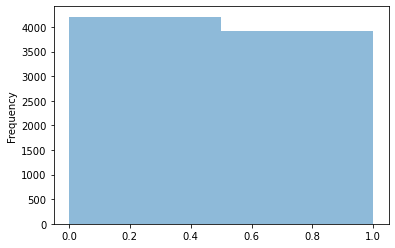

In [60]:
# Draw the istogram of the 'class' field. Decribe wath yuou see
hist      = df['class'].plot.hist(bins = 2, alpha=0.5)

7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

In [66]:
#!wget https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv -P ~/Desktop/Data/04ex

--2021-12-13 17:04:12--  https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/vkl89yce7xjdq4n/regression_generated.csv [segue]
--2021-12-13 17:04:13--  https://www.dropbox.com/s/raw/vkl89yce7xjdq4n/regression_generated.csv
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf86c00b30600fbe814dfa7b55d.dl.dropboxusercontent.com/cd/0/inline/BbyKXAUDqKdJOdNubEt2yxjBb4Wt65PvIBggkIvXTGt8cpVJ9UOBixZWlVB28j33_FUps0txEhcMvH4xPzU3gdMa63Jf4An88hIGjVHwCeSQGAkC5FUYaWpXgpvBqTJwj7W1UWANRel_Kg_ZMuVjApAt/file# [segue]
--2021-12-13 17:04:13--  https://ucf86c00b30600fbe814dfa7b55d.dl.dropboxusercontent.com/cd/0/inline/BbyKXAUDqKdJOdNubEt2yxjBb4Wt65PvIBggkIvXTGt8cpVJ9UOBix

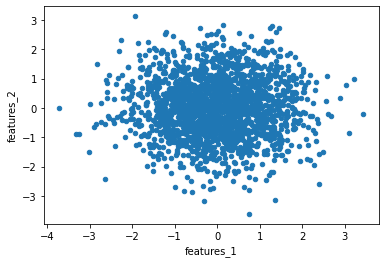

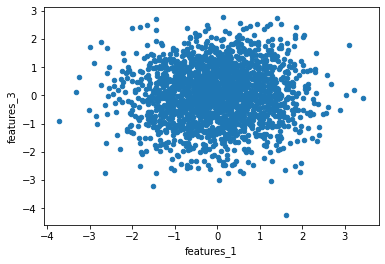

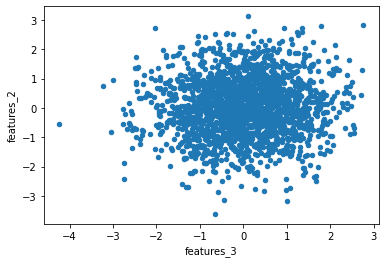

In [95]:
data_file = open( '../Data/04ex/regression_generated.csv', 'rb' )
df        = pd.read_csv (data_file)
df


ax1=df.plot.scatter(x='features_1',
                      y='features_2',
                      #c='features_3',
                      colormap='viridis')

ax2 = df.plot.scatter(x='features_1',
                      y='features_3',
                      #c='features_2',
                      colormap='viridis')

ax3 = df.plot.scatter(x='features_3',
                      y='features_2',
                      #c='features_1',
                      colormap='viridis')
    


8\. Load the same file of point 6, and convert the file to json with Pandas.

In [96]:
url       ='https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1'
data_file = urllib.request.urlopen(url)
df        = pd.read_csv (data_file)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [98]:
N = df.shape[ 0 ]
D = [ ]

with open( 'mushrooms_categorized.json', 'w' ) as file:
    for i in range ( N ):
        d = df.iloc[i, :].to_dict( )
        D.append( d )
        
    #print( D, '\n' )
    json.dump( D, file )

file.close( )